## Bike Sharing Assignment
#### Submitted by - Sidhant Das

In [49]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings as w
w.filterwarnings('ignore')

### Reading, understanding and visualizing the data

In [2]:
# Reading data from csv
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the dataframe
bike_sharing_df.shape

(730, 16)

In [4]:
# Checking for detailed info about the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking metadata for each column in the dataset
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for null values
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Checking for unique values
bike_sharing_df.nunique() 

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Observations after glancing through the dataset:
- There are no missing values in any of the columns.
- The column 'instant' is an index column, so can be dropped from the df.
- 'dteday' also can be dropped since it is not useful.
- 'cnt' is the total number of bikes rented and is the target variable. 
- 'casual' and 'registered' columns sum up to the values in 'cnt' and thus cannot be considered as features predicting/impacting
  the target variable.

In [8]:
# Based on above observations, dropping columns - instant, dteday, casual and registered
bike_sharing_df = bike_sharing_df.drop(columns = ['instant', 'dteday', 'casual', 'registered'])

In [9]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


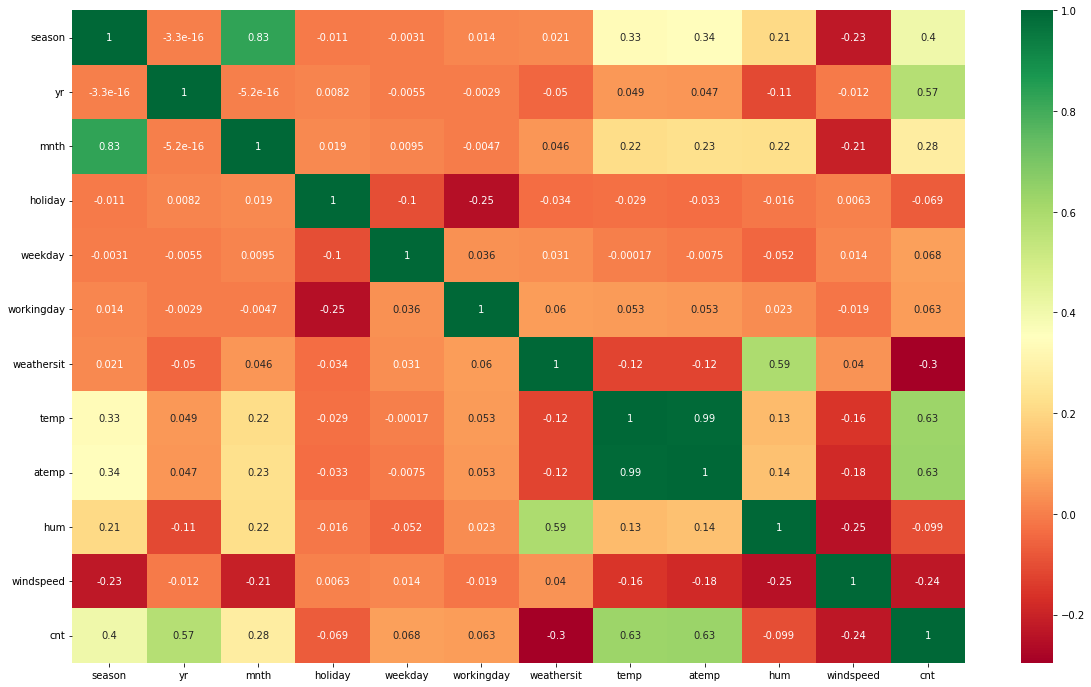

In [10]:
plt.figure(figsize = (20, 12))
sns.heatmap(bike_sharing_df.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

#### Observations:
- 'cnt' has good correlation with 'yr', 'temp', 'atemp'.
- 'season' and 'mnth' have good correlation with each other.
- 'temp' and 'atemp' have very high correlation with each other.

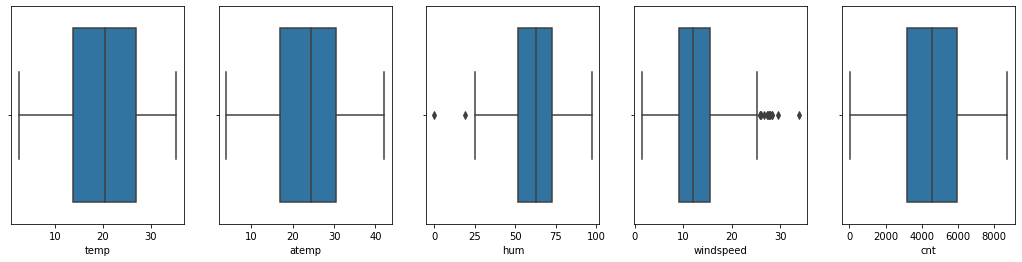

In [11]:
# Checking boxplots for the numerical columns for outliers etc
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize = (18, 4))

i = 1
for col in num_cols:
    plt.subplot(1, 5, i)
    sns.boxplot(bike_sharing_df[col])
    i = i + 1

In [12]:
# Checking for mean and median values for the numerical columns
bike_sharing_df[num_cols].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Observations:
- The median and means for all numerical columns are close to each other and the outlier-handling is not required.

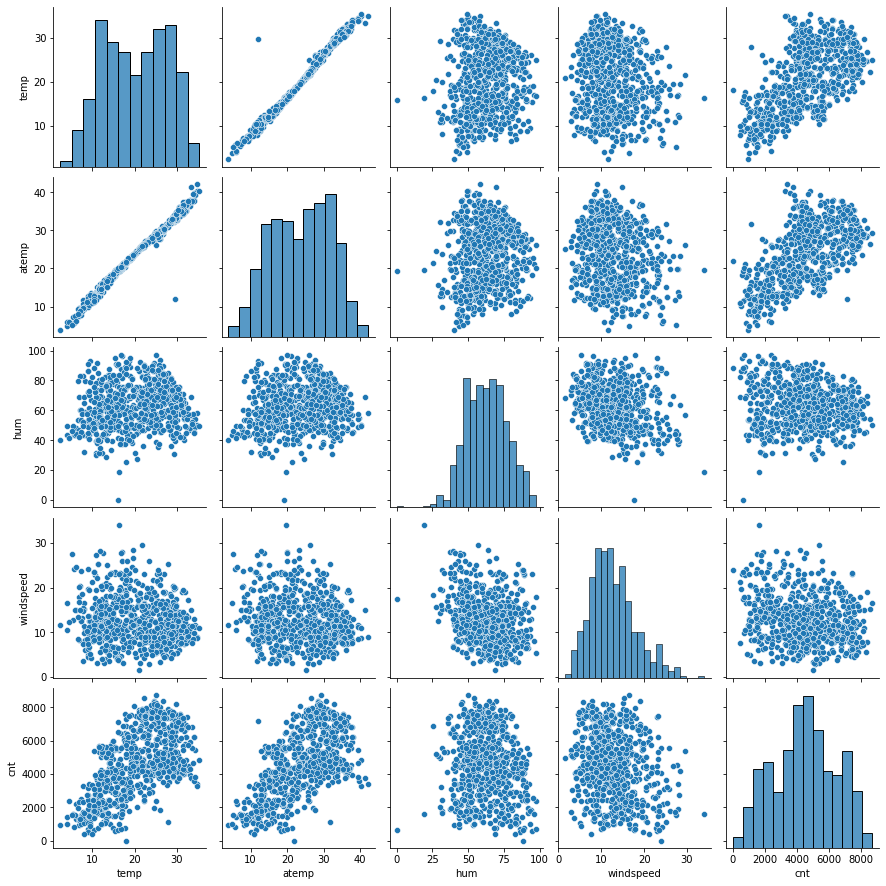

In [13]:
# Running pair-plots to see the distribution of the numerical columns
sns.pairplot(bike_sharing_df[num_cols])
plt.show()

In [14]:
# Mapping the appropriate values for the categorical columns

weather_mapping = {
    1: 'clear_weather',
    2: 'misty_weather',
    3: 'light_rain_snow',
    4: 'heavy_rain_snow_fog'
}

season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

mnth_mapping = {
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'aug',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'dec'
}

weekday_mapping = {
    0: 'sun',
    1: 'mon',
    2: 'tue',
    3: 'wed',
    4: 'thu',
    5: 'fri',
    6: 'sat'
}

bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map(weather_mapping)
bike_sharing_df['season'] = bike_sharing_df['season'].map(season_mapping)
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].map(mnth_mapping)
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].map(weekday_mapping)

In [15]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty_weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty_weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear_weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear_weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear_weather,9.305237,11.46350,43.6957,12.522300,1600


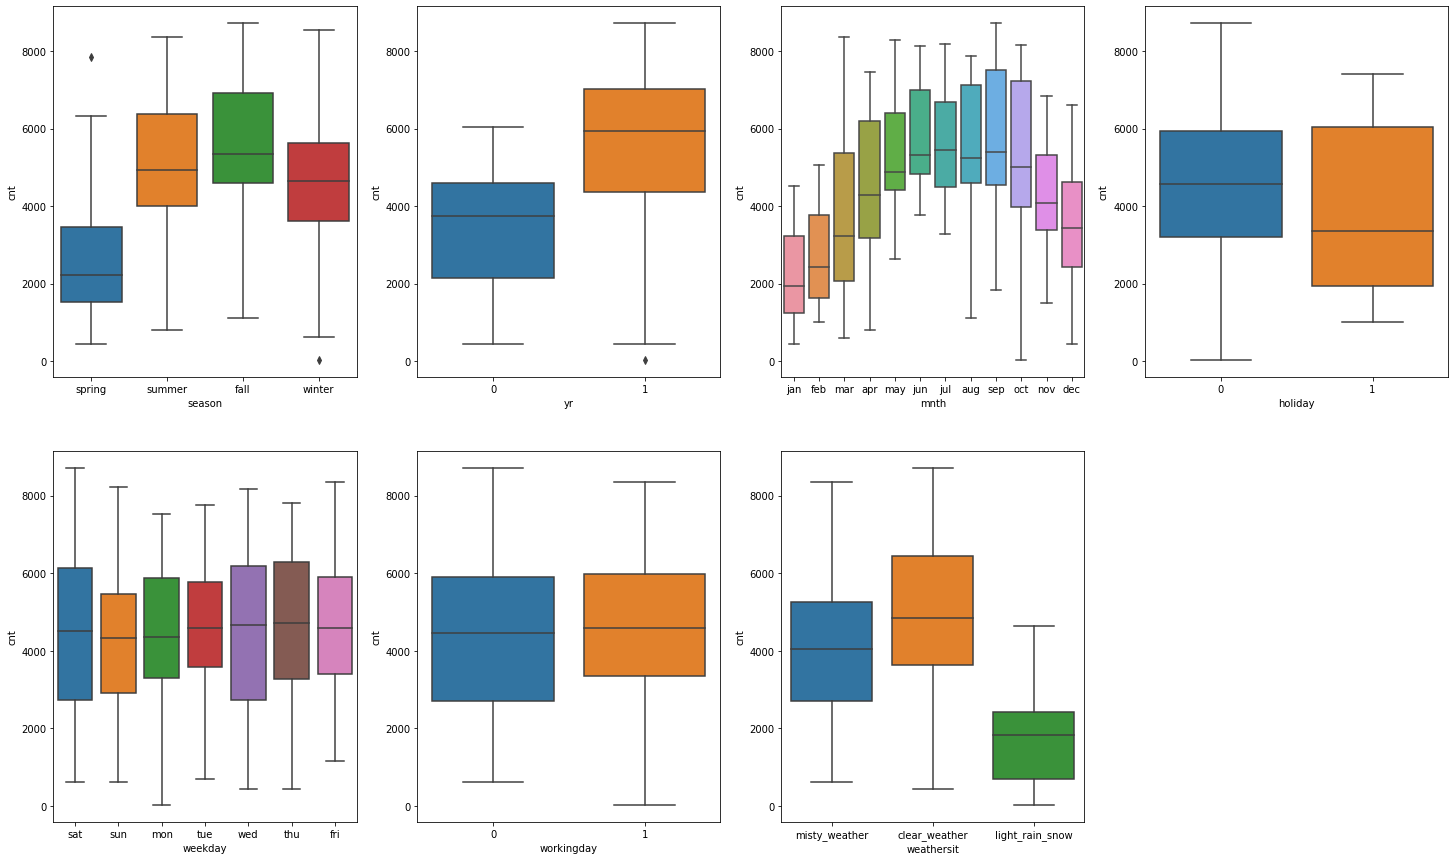

In [16]:
# Visualizing the categorical variables
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
n = 1
plt.figure(figsize=(25, 15))
for col in cat_cols:
    plt.subplot(2, 4, n)
    sns.boxplot(bike_sharing_df[col], bike_sharing_df['cnt'])
    n = n + 1

plt.show()

#### Observations:
- Among the seasons, Fall has the highest demand and spring has the lowest.
- Demand for bike sharing has significantly improved in the year 2019.
- Across the months, the demand increases from Jan to Sep/Oct, after which there is a drastic fall in demand until Dec.
- Days with clear weather has the highest demand of bikes followed by misty weather and days with light rain and snow has the    lowest demand. There is no demand at all on days with heavy rain/snow/thunderstorm.

### Data preparation 

In [17]:
# Creating dummy variables
season_status = pd.get_dummies(bike_sharing_df['season'], drop_first=True)
mnth_status = pd.get_dummies(bike_sharing_df['mnth'], drop_first=True)
weekday_status = pd.get_dummies(bike_sharing_df['weekday'], drop_first=True)
weather_status = pd.get_dummies(bike_sharing_df['weathersit'])

# Concat the dummy dfs with the original one
bike_sharing_df = pd.concat([bike_sharing_df, weather_status, season_status, mnth_status, weekday_status], axis = 1)

# Dropping original columns for the dummy variables
bike_sharing_df = bike_sharing_df.drop(columns = ['season', 'weathersit', 'mnth', 'weekday'])

bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,clear_weather,light_rain_snow,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Checking all the current columns
bike_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'clear_weather', 'light_rain_snow', 'misty_weather', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [19]:
# Checking the shape of the dataframe
bike_sharing_df.shape

(730, 31)

### Train-test split

In [20]:
# Assigning only the target variable to y
y = bike_sharing_df.pop('cnt')

# Assigning the remaining variables to X
X = bike_sharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [21]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Rescaling the features

In [22]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# Instantiate an object
scaler = MinMaxScaler()

# Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [23]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,clear_weather,light_rain_snow,misty_weather,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.624266,0.029354,0.346380,...,0.091977,0.091977,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.484786,0.168963,0.476282,...,0.289276,0.289276,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Fitting the model on training data
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
# Use RFE to start with 15 features
rfe = RFE(estimator = lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [26]:
# Checking the ranking of each column assigned by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('clear_weather', True, 1),
 ('light_rain_snow', True, 1),
 ('misty_weather', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', False, 11),
 ('jan', False, 15),
 ('jul', False, 2),
 ('jun', False, 16),
 ('mar', False, 5),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', False, 3),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 9),
 ('wed', False, 14)]

In [27]:
# Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [28]:
# Function to calculate VIFs and print them
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [29]:
# Checking the 15 columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'clear_weather', 'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat', 'sun'],
      dtype='object')

In [30]:
X_train_rfe = X_train[col]

In [31]:
# Model-1
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'clear_weather', 'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat', 'sun']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.92e-183
Time:                        13:19:05   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1450.1081    220.914     

In [32]:
# holiday has high p-value and high VIF; removing it.
# Model-2
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'clear_weather', 'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat', 'sun']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     190.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.92e-183
Time:                        13:19:05   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     497   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1402.1617    305.978     

In [33]:
# sun has high p-value; removing it.
# Model-2
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
       'clear_weather', 'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.07e-184
Time:                        13:19:05   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1606.8204    267.257     

In [34]:
# clear_weather has high VIF; removing it.
# Model-2
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed',
        'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.07e-184
Time:                        13:19:05   Log-Likelihood:                -4137.1
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8355.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2940.6564    318.188     

In [35]:
# hum has high VIF; removing it.
# Model-3
cols = ['yr', 'workingday', 'atemp', 'windspeed',
        'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.24e-183
Time:                        13:19:05   Log-Likelihood:                -4142.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     499   BIC:                             8360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2273.6692    250.405     

In [36]:
# atemp has high VIF; removing it.
# Model-4
cols = ['yr', 'workingday', 'windspeed',
        'light_rain_snow', 'misty_weather', 'spring', 'winter',
       'dec', 'nov', 'sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.20e-159
Time:                        13:19:05   Log-Likelihood:                -4200.9
No. Observations:                 511   AIC:                             8424.
Df Residuals:                     500   BIC:                             8470.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4663.5941    149.953     

In [37]:
# Removing 'winter', since it has a high p-value
# Model-5
cols = ['yr', 'workingday', 'windspeed', 'light_rain_snow', 'misty_weather', 'spring', 'dec', 'nov', 'sat']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.93e-160
Time:                        13:19:05   Log-Likelihood:                -4202.6
No. Observations:                 511   AIC:                             8425.
Df Residuals:                     501   BIC:                             8468.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4726.5454    146.283     

#### All the features in Model-5 above have low p-values and have low VIF signifying low multicollinearity. This can be considered as our final model, considering that it works well on our test data.

In [38]:
# Function to build a model and fit them on the corresponding dataset
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [39]:
# Building the model with columns from the finalized model
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4726.545426794572 [ 2060.65784237   472.16822465 -1254.57964913 -2419.02439768
  -729.46198932 -2643.89308352  -934.40155687 -1111.83239045
   425.85304731]


### Residual Analysis

In [40]:
y_train_pred = lr.predict(X_train[cols])

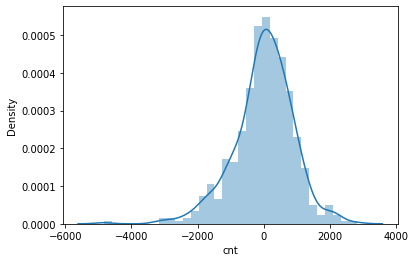

In [41]:
# Plot a histogram of the residuals
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

#### Observations:
- The residuals plot suggests that the linear regression model's residuals are approximately normally distributed and centered around zero, which indicates that the model fits the data reasonably well and that the assumptions of normality and homoscedasticity are not violated significantly.

### Predictions and Evaluations on the test set

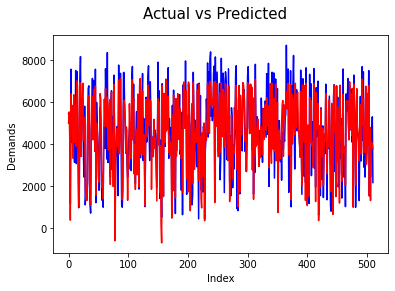

In [42]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [43]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7827145470955915

In [44]:
# Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

# Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [45]:
# Predicting test data values
y_test_pred = lr.predict(X_test[cols])

In [46]:
# Checking for r2 score for y_test vs y_test_pred
r2_score(y_test,y_test_pred)

0.7465620589947638

Text(0, 0.5, 'y_test_pred')

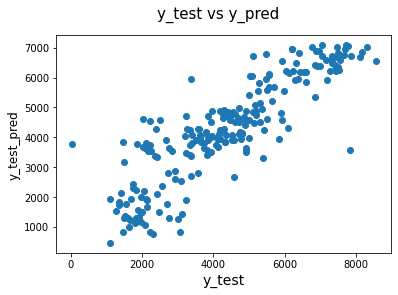

In [47]:
# Scatter plot for y_test vs y_test_pred
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_pred', fontsize = 12) 

#### Observations:
- The scatter plot indicates that the linear regression model is performing reasonably well, with predictions closely aligning with actual values. 

#### Final Model:
- Based on the final model, following are the features which impact the bike sharing demand:
    - windspeed
    - workingday
    - yr
    - misty_weather
    - sat
    - spring
    - nov
    - dec
    - light_rain_snow
    
- Following are the corresponding coefficients for the variables:
        - const            4726.5454
        - yr               2060.6578
        - workingday        472.1682
        - windspeed       -1254.5796
        - light_rain_snow -2419.0244
        - misty_weather    -729.4620
        - spring          -2643.8931
        - dec              -934.4016
        - nov             -1111.8324
        - sat               425.8530